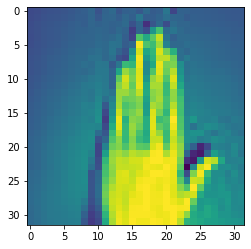

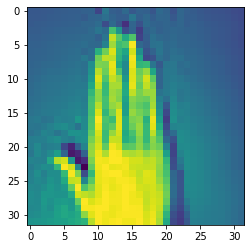

In [59]:
# test import .jpg img / take a look of data
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np

lena = mpimg.imread('./All_gray_1_32_32/Set1/0000/0000/frame-0001.jpg') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
lena.shape 

plt.imshow(lena) # 显示图片
# plt.axis('off') # 不显示坐标轴
plt.show()
plt.imshow(lena[:,::-1]) # 垂直鏡射
plt.show()

In [1]:
import itertools
import os

import matplotlib.pyplot as plt # plt 用
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np

path_of_TrainSets = [
    'Set1', 'Set2', 'Set3'
]
path_of_TestSets = [
    'Set4', 'Set5'
]
path_of_type = [
    '0000', '0001', '0002',
    '0003', '0004', '0005',
    '0006', '0007', '0008'
]
path_of_dataID = [
    '0000', '0001', '0002', '0003', '0004',
    '0005', '0006', '0007', '0008', '0009',
    '0010', '0011', '0012', '0013', '0014',
    '0015', '0016', '0017', '0018', '0019',
]

def get_train_datas():
    train_data = []
    train_label = []
    
    for gen_path in itertools.product(path_of_TrainSets, path_of_type, path_of_dataID):
        path = 'All_gray_1_32_32/' + '/'.join(gen_path) + '/'
        for img in os.listdir(path):
             if img.endswith('jpg'):
                path += img
                train_data.append(mpimg.imread(path))
                # 垂直鏡射增加資料集
                train_data.append(mpimg.imread(path)[:,::-1])
        
        if gen_path[1] in ('0000', '0001', '0002'):
            train_label.append(0)
            train_label.append(0)
        elif gen_path[1] in ('0003', '0004', '0005'):
            train_label.append(1)
            train_label.append(1)
        elif gen_path[1] in ('0006', '0007', '0008'):
            train_label.append(2)
            train_label.append(2)

    return  np.array(train_data),  np.array(train_label)

def get_test_datas():
    train_data = []
    train_label = []
    
    for gen_path in itertools.product(path_of_TestSets, path_of_type, path_of_dataID):
        path = 'All_gray_1_32_32/' + '/'.join(gen_path) + '/'
        for img in os.listdir(path):
             if img.endswith('jpg'):
                path += img
                train_data.append(mpimg.imread(path))
        
        if gen_path[1] in ('0000', '0001', '0002'):
            train_label.append(0)
        elif gen_path[1] in ('0003', '0004', '0005'):
            train_label.append(1)
        elif gen_path[1] in ('0006', '0007', '0008'):
            train_label.append(2)

    return  np.array(train_data),  np.array(train_label)


In [2]:
train_data, train_label = get_train_datas()
test_data, test_label = get_test_datas()

train_data = train_data.reshape(train_data.shape[0], 1, 32, 32)
test_data = test_data.reshape(test_data.shape[0], 1, 32, 32)

In [3]:
# train_data = train_data/255.0
# test_data = test_data/255.0

In [4]:
from keras import regularizers
from keras.utils import np_utils
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Flatten, Reshape, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import Adam, Nadam

Using TensorFlow backend.


In [5]:
# one-hot encoding
train_label = np_utils.to_categorical(train_label)
test_label = np_utils.to_categorical(test_label)

In [6]:
# divide data into training and validation
train_features, vali_features, train_labels, vali_labels = train_test_split(train_data, train_label, 
                                                                           test_size=0.2)

In [7]:
# check data shapes
print ('train_features shape: ', train_features.shape)
print ('vali_features shape: ', vali_features.shape)
print ('train_labels shape: ', train_labels.shape)
print ('vali_labels shape: ', vali_labels.shape)

train_features shape:  (864, 1, 32, 32)
vali_features shape:  (216, 1, 32, 32)
train_labels shape:  (864, 3)
vali_labels shape:  (216, 3)


In [8]:
# build model
model = Sequential()

model.add(InputLayer(input_shape=(1,32,32)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu',bias_initializer='RandomNormal', kernel_initializer='random_uniform', data_format = 'channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
model.add(Dropout(0.35))

model.add(Conv2D(128, (3, 3) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(64))  
model.add(Dropout(0.35))
model.add(Dense(32) )
model.add(Dropout(0.35))

model.add(Dense(3, activation='softmax',))








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


D:\programs\Anaconda\envs\deeplearn\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  
D:\programs\Anaconda\envs\deeplearn\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  if sys.path[0] == '':


In [9]:
# take a look of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 1, 32, 32)         128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 30, 30)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 15, 15)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 15, 15)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 13, 128)       17408     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 6, 64)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 62, 6, 64)         0         
__________

In [10]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=Nadam(), metrics=['accuracy']) 

In [11]:
# training
eps = 100

import time
start_time = time.time()

training = model.fit(train_features, train_labels,
                     validation_data=(vali_features, vali_labels),
                     epochs=eps,
                     batch_size=256)

training_time = time.time() - start_time

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 864 samples, validate on 216 samples
Epoch 1/100
864/864 [==============================] - 6s 7ms/step - loss: 4.7214 - acc: 0.3345 - val_loss: 1.0645 - val_acc: 0.3796
Epoch 2/100
864/864 [==============================] - 0s 346us/step - loss: 1.0755 - acc: 0.4329 - val_loss: 1.0563 - val_acc: 0.5417
Epoch 3/100
864/864 [==============================] - 0s 343us/step - loss: 1.0215 - acc: 0.5069 - val_loss: 1.0350 - val_acc: 0.6620
Epoch 4/100
864/864 [==============================] - 0s 343us/step - loss: 0.9611 - acc: 0.6123 - val_loss: 0.9956 - val_acc: 0.7176
Epoch 5/100
864/864 [==============================] - 0s 346us/step - loss: 0.8881 - acc: 0.6678 - val_loss: 0.9121 - val_acc: 0.6620
Epoch 6/100
864/864 [==============================] - 0s 345us/step - loss: 0.7961 - acc: 0.6979 - val_loss: 0.8126 - val_acc: 0.7269
Epoch 7/100
864/864 [==============================]

864/864 [==============================] - 0s 343us/step - loss: 0.0127 - acc: 0.9965 - val_loss: 0.0608 - val_acc: 0.9769
Epoch 59/100
864/864 [==============================] - 0s 344us/step - loss: 0.0083 - acc: 0.9977 - val_loss: 0.0670 - val_acc: 0.9722
Epoch 60/100
864/864 [==============================] - 0s 346us/step - loss: 0.0120 - acc: 0.9965 - val_loss: 0.0654 - val_acc: 0.9769
Epoch 61/100
864/864 [==============================] - 0s 346us/step - loss: 0.0087 - acc: 0.9988 - val_loss: 0.0511 - val_acc: 0.9769
Epoch 62/100
864/864 [==============================] - 0s 347us/step - loss: 0.0063 - acc: 0.9988 - val_loss: 0.0506 - val_acc: 0.9815
Epoch 63/100
864/864 [==============================] - 0s 346us/step - loss: 0.0098 - acc: 0.9977 - val_loss: 0.1425 - val_acc: 0.9491
Epoch 64/100
864/864 [==============================] - 0s 343us/step - loss: 1.4836 - acc: 0.8009 - val_loss: 1.2226 - val_acc: 0.3843
Epoch 65/100
864/864 [==============================] - 0s 34

In [12]:
model.evaluate(test_data,test_label)

360/360 [==============================] - 0s 269us/step


[0.22707958646561666, 0.9333333333333333]

## Training 100 epochs in 0:36.4


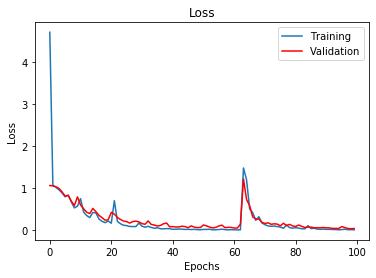

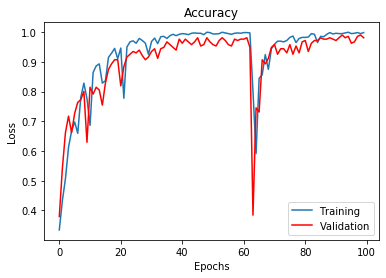

In [13]:
# plot part

mm = training_time // 60
ss = training_time % 60
print('## Training {} epochs in {}:{}'.format(eps, int(mm), round(ss, 1)))

# show the loss and accuracy
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['acc']
val_acc = training.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()